<a href="https://colab.research.google.com/github/epic-coder97/Data-602/blob/main/Homework%20%7C%20Week%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework | Week 3

#### Nikita Dharmadhikari


---

Time Series Analysis



---



In [ ]:
# importing all the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [ ]:
#uploaded the CSV file and read 
#reading the data from csv file into dataframe
data = pd.read_csv('/content/drive/MyDrive/DATA 602 Spring 2022/Data Files/multiTimeline.csv')


In [ ]:
'''Q) - Check the information about the data. '''
## let's check the datatype of the all the column espicially the Month column.

''' .info() - This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage. '''

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Month    168 non-null    object
 1   Diet     168 non-null    int64 
 2   Gym      168 non-null    int64 
 3   Finance  168 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.4+ KB


In [ ]:
# converting the 'month' column into a ‘DateTime’ data type
'''  Pandas to_datetime() method helps to convert string Date time into Python Date time object. '''
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')

# checking datatype of month column
data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Month    168 non-null    datetime64[ns]
 1   Diet     168 non-null    int64         
 2   Gym      168 non-null    int64         
 3   Finance  168 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 5.4 KB


In [ ]:
''' head() method is used to return top n (5 by default) rows of a data frame or series '''
data.head(5)

,Month,Diet,Gym,Finance
0,2004-01-01,100,31,48
1,2004-02-01,75,26,49
2,2004-03-01,67,24,47
3,2004-04-01,70,22,48
4,2004-05-01,72,22,43


In [ ]:
# making "month" column as index
''' set_index() is a method to set a List, Series or Data frame column as index of a Data Frame. '''
data.set_index('Month' , inplace=True)

In [ ]:
data.head(5)   #looking at the first 5 rows

,Diet,Gym,Finance
Month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


In [ ]:
''' Describe function returns the statistical summary of the dataframe or series. This includes count, mean, median (or 50th percentile) standard variation, min-max, and percentile values of columns '''
data.describe()

,Diet,Gym,Finance
count,168.000000,168.000000,168.000000
mean,49.642857,34.690476,47.148810
std,8.033080,8.134316,4.972547
min,34.000000,22.000000,38.000000
25%,44.000000,28.000000,44.000000
50%,48.500000,32.500000,46.000000
75%,53.000000,41.000000,50.000000
max,100.000000,58.000000,73.000000


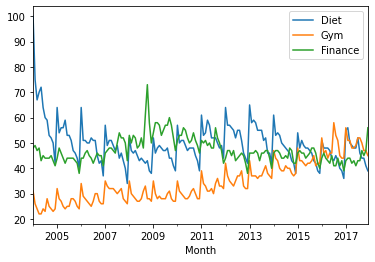

In [ ]:
''' .plot() is used to create graphs ( by default line) from your Dataframe in this case data '''
data.plot()

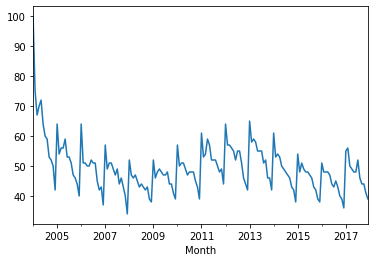

In [ ]:
# ploting Diet 

data['Diet'].plot()

In [ ]:
''' An average of the last n values in a data set, applied row-by-row, so that you get a series of averages where 
n is the window.
Use a rolling average, though, and you start to see a pattern emerge, with peaks happening more and more often  '''

from pandas.core import window
rolling_mean_diet = data['Diet'].rolling(window=12).mean()
rolling_mean_diet

rolling_mean = data.rolling(window=12).mean()

In [ ]:
# getting rolling mean of GYM
rolling_mean_gym = data['Gym'].rolling(window=12).mean()
rolling_mean_gym

Month
2004-01-01          NaN
2004-02-01          NaN
2004-03-01          NaN
2004-04-01          NaN
2004-05-01          NaN
                ...    
2017-08-01    49.250000
2017-09-01    49.166667
2017-10-01    49.333333
2017-11-01    49.583333
2017-12-01    49.666667
Name: Gym, Length: 168, dtype: float64

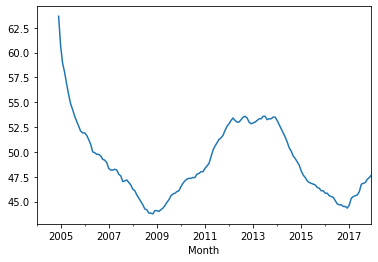

In [ ]:
# - Use the rolling average of ‘diet’ using pandas’ ‘rolling’ method
rolling_mean_diet.plot()

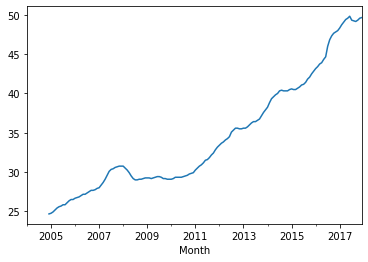

In [ ]:
# - Use the rolling average of ‘diet’ using pandas’ ‘rolling’ method
rolling_mean_gym.plot()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


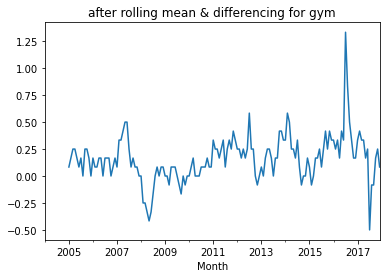

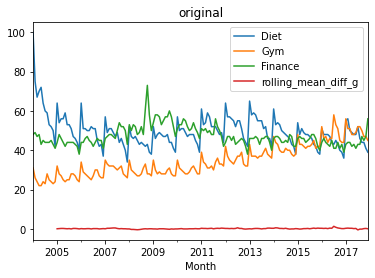

In [ ]:
# subtracting trend of rolling mean from original signal and storing it in the dataframe
data['rolling_mean_diff_g'] = rolling_mean_gym - rolling_mean_gym.shift()
ax1 = plt.subplot()
data['rolling_mean_diff_g'].plot(title='after rolling mean & differencing for gym');

ax2 = plt.subplot()
data.plot(title='original');

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


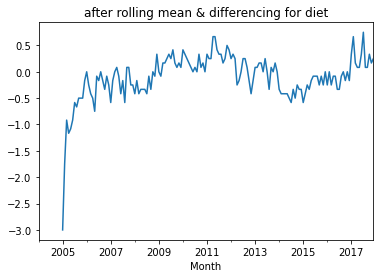

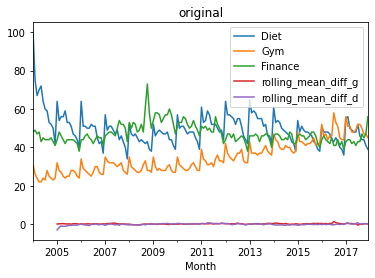

In [ ]:
# doing the same thing for diet
data['rolling_mean_diff_d'] = rolling_mean_diet - rolling_mean_diet.shift()
ax1 = plt.subplot()
data['rolling_mean_diff_d'].plot(title='after rolling mean & differencing for diet');

ax2 = plt.subplot()
data.plot(title='original');


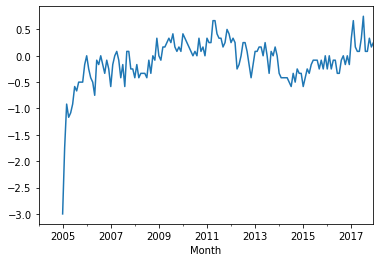

In [ ]:
# first order differencing
''' .diff() - Calculates the difference of a Dataframe element compared with another element in the Dataframe (default is element in previous row). '''
rolling_mean_diet.diff().plot()

In [ ]:
# Check the correlation among the variables
''' corr() is used to find the pairwise correlation of all columns in the dataframe '''
data.corr()

,Diet,Gym,Finance,rolling_mean_diff_g,rolling_mean_diff_d
Diet,1.000000,-0.100764,-0.034639,0.113528,-0.060728
Gym,-0.100764,1.000000,-0.284279,0.421388,0.175711
Finance,-0.034639,-0.284279,1.000000,-0.333589,0.218924
rolling_mean_diff_g,0.113528,0.421388,-0.333589,1.000000,0.025245
rolling_mean_diff_d,-0.060728,0.175711,0.218924,0.025245,1.000000


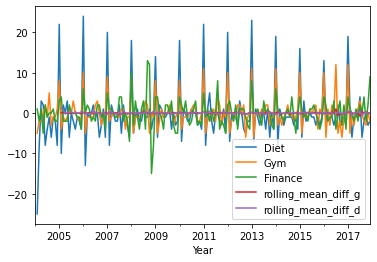

In [ ]:
#  plotting the first-order differences
data.diff().plot()
plt.xlabel('Year'); 

In [ ]:
#  Now, compute the correlation coefficients of the first-order differences of these time series
data.diff().corr()

,Diet,Gym,Finance,rolling_mean_diff_g,rolling_mean_diff_d
Diet,1.000000,0.758707,0.373828,0.014765,0.095287
Gym,0.758707,1.000000,0.301111,0.309087,-0.076800
Finance,0.373828,0.301111,1.000000,-0.086452,-0.007885
rolling_mean_diff_g,0.014765,0.309087,-0.086452,1.000000,-0.040351
rolling_mean_diff_d,0.095287,-0.076800,-0.007885,-0.040351,1.000000


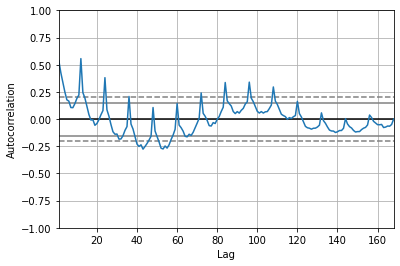

In [ ]:
# plot the time series 'diet'.
pd.plotting.autocorrelation_plot(data['Diet'])

The dotted lines = the statistical significance of the correlation.

The seasonality for the above graph = 12 as we can see the spikes form after every 12 months 